In [34]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [35]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
lending_data.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [36]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop(columns=['loan_status'])

In [37]:
# Review the y variable Series
# Display the first few entries of the y variable
y.head()


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [38]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [39]:
### Step 3: Split the data into training and testing datasets by using `train_test_split`.
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (58152, 7)
X_test shape: (19384, 7)
y_train shape: (58152,)
y_test shape: (19384,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [40]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using the training data
logistic_model.fit(X_train, y_train)

# Display the first few predictions
predictions = logistic_model.predict(X_test)
print(predictions[:10])



[0 0 0 0 0 0 0 0 0 0]


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [41]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)

# Display the first few predictions
print("First 10 Predictions:", y_pred[:10])

# Display the corresponding actual values
print("First 10 Actual Values:", y_test[:10].values)


First 10 Predictions: [0 0 0 0 0 0 0 0 0 0]
First 10 Actual Values: [0 0 0 0 0 0 0 0 0 0]


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

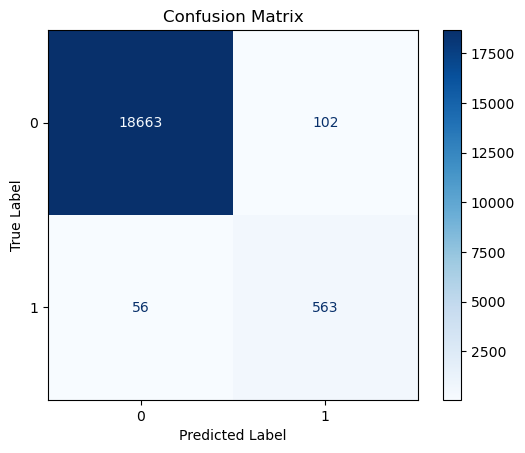

In [46]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('True Label')

# Show the plot
plt.show()


In [47]:
# Print the classification report for the model
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The classification report indicates that the logistic regression model performs exceptionally well on both the 0 (healthy loan) and 1 (high-risk loan) labels. Let's break down the key metrics to understand how well the model predicts both classes:

Class 0 (Healthy Loans)

Precision: 1.00

This means that nearly all loans predicted as healthy (0) are actually healthy. The model has almost no false positives for this class.

Recall: 0.99

This indicates that the model correctly identifies 99% of the actual healthy loans. There are very few false negatives for this class.

F1-score: 1.00

The F1-score, which balances precision and recall, is perfect, indicating excellent performance for this class.

Support: 18,765

The number of actual instances in the test set for this class.

Class 1 (High-risk Loans)

Precision: 0.85

This means that 85% of loans predicted as high-risk (1) are actually high-risk. There are some false positives for this class.

Recall: 0.91

This indicates that the model correctly identifies 91% of the actual high-risk loans. There are some false negatives for this class.

F1-score: 0.88

The F1-score is high, indicating good performance for this class, though not as perfect as for Class 0.

Support: 619

The number of actual instances in the test set for this class.

Overall Performance

Accuracy: 0.99

The overall accuracy is very high, indicating that the model correctly classifies most loans.

Macro Average:

Precision: 0.92

Recall: 0.95

F1-score: 0.94

These averages provide a balanced view of the model's performance across both classes.

Weighted Average:

Precision: 0.99

Recall: 0.99

F1-score: 0.99

These averages take class imbalance into account, showing that the model performs exceptionally well overall.

---